In [4]:
import requests
from pprint import pprint

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import time
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

In [2]:
api_key = "api-key=td7X3SlGWRvZfBdGcUsdB5QqfRgJ7gut"

## Semantic

Search for organization name to be used in Article Search

In [102]:
url = "http://api.nytimes.com/svc/semantic/v2/concept/search.json"

params = {
    "query": "unitedhealth",
    "concept_type":"nytd_porg",
    "api-key": "td7X3SlGWRvZfBdGcUsdB5QqfRgJ7gut",
}

# query = "query=microsoft"
# url = f"{endpoint}?{query}&concept_type=nytd_porg&{api_key}"
response = requests.get(url, params=params)

In [103]:
response.json()

{'copyright': 'Copyright (c) 2021 The New York Times Company. All Rights Reserved.',
 'fields': [],
 'num_results': 2,
 'results': [{'concept_created': '"2009-10-28 14:30:04-04:00"',
   'concept_gender': None,
   'concept_id': 42080,
   'concept_is_locked_by': None,
   'concept_name': 'UnitedHealth Group',
   'concept_rule': None,
   'concept_semaphore_evidence': None,
   'concept_semaphore_uri': None,
   'concept_status': 'Deleted',
   'concept_suggest_backend': 'Semaphore',
   'concept_type': 'nytd_porg',
   'concept_updated': '"2013-07-22 15:44:28-04:00"',
   'concept_uri': 'nyt://organization/fcf01b3d-47b9-5383-ba0a-b967c283b59f',
   'is_sensitive': 0,
   'is_times_tag': 0,
   'vernacular': 'UnitedHealth Group'},
  {'concept_created': '"2013-02-26 01:58:26-05:00"',
   'concept_gender': None,
   'concept_id': 1098324,
   'concept_is_locked_by': None,
   'concept_name': 'UnitedHealth Group Inc',
   'concept_rule': None,
   'concept_semaphore_evidence': None,
   'concept_semaphore_uri

In [104]:
org = 'UnitedHealth Group'
url = f"http://api.nytimes.com/svc/semantic/v2/concept/name/nytd_porg/{org}"

params = {
    "fields": "all",
    "api-key": "td7X3SlGWRvZfBdGcUsdB5QqfRgJ7gut",
}


# endpoint = "http://api.nytimes.com/svc/semantic/v2/concept/name"

# url = f"{endpoint}/nytd_porg/{org}?fields=all&{api_key}"
response = requests.get(url, params=params)

In [105]:
response.json()

{'copyright': 'Copyright (c) 2021 The New York Times Company. All Rights Reserved.',
 'fields': ['all'],
 'num_results': 1,
 'results': [{'ancestors': [],
   'article_list': {'results': [{'body': 'The UnitedHealth Group reports 10 percent earnings increase in the fourth quarter.',
      'byline': 'By Reed Abelson',
      'concepts': {'nytd_des': ['Health Insurance and Managed Care'],
       'nytd_org': ['UnitedHealth Group']},
      'date': '2011-01-20T20:07:14+0000',
      'document_type': 'article',
      'title': 'Insurers Reporting Healthy Profits',
      'type_of_material': None,
      'url': 'https://prescriptions.blogs.nytimes.com/2011/01/20/insurers-reporting-healthy-profits/'},
     {'body': 'Andrew M. Cuomo is widely credited with building on the legacy of the previous attorney general. But the praise is neither universal nor complete.',
      'byline': 'By Alison Leigh Cowan',
      'concepts': {'nytd_des': ['Health Insurance and Managed Care',
        'Attorneys General',
 

## Article Search

In [110]:
# Set the API endpoint and initial parameters
url = "https://api.nytimes.com/svc/search/v2/articlesearch.json"
params = {
    "q": "",
    "begin_date": "20210301",
    "end_date": "20230317",
    "api-key": "td7X3SlGWRvZfBdGcUsdB5QqfRgJ7gut",
}

# Define the list of organizations to search for
organizations = [
#      'Apple Inc', 
#      'Amazon.com Inc', 
#      'Facebook Inc', 
#      'Alphabet Inc', 
#      'Tesla Motors Inc', 
#      'Microsoft Corp',
#      'NVIDIA Corporation',
     'UnitedHealth Group Inc',
#      'Exxon Mobil Corp',
#      'Johnson & Johnson',
#      'JPMorgan Chase & Company',
#      'Visa Inc',
#      'Procter & Gamble Company',
#      'MasterCard Inc',
#      'Home Depot Inc',
#      'AbbVie Inc',
#      'Chevron Corp',
#      'Eli Lilly and Company',
#      'Broadcom Corporation',
#      'Pepsico Inc',
#      'Coca-Cola Co',
#      'Pfizer Inc',
    
]

# Initialize a list to store all the DataFrames
df_list = []

# Loop through all organizations and all pages of results to retrieve the articles
for organization in organizations:
    params["fq"] = f"organizations:({organization})"
    articles = []
    params["page"] = 0 # start with the first page of results
    while True:
        print(params)
        response = requests.get(url, params=params)
        print(response.json()['response']['meta'])
        # 10 requests per minute so sleep 6 seconds between requests
        time.sleep(6)
        
        response_json = response.json()
        docs = response_json["response"]["docs"]
        
        # Check if there are any more pages of results
        if len(docs) == 0:
            break

        # Append the articles from this page to the overall list
        articles.extend(docs)

        # Increment the page number to retrieve the next page of results
        params["page"] += 1
    
    df = pd.DataFrame(articles)
    df["Organization"] = organization
    df_list.append(df)

{'q': '', 'begin_date': '20210301', 'end_date': '20230317', 'api-key': 'td7X3SlGWRvZfBdGcUsdB5QqfRgJ7gut', 'fq': 'organizations:(UnitedHealth Group Inc)', 'page': 0}
{'hits': 6, 'offset': 0, 'time': 9}
{'q': '', 'begin_date': '20210301', 'end_date': '20230317', 'api-key': 'td7X3SlGWRvZfBdGcUsdB5QqfRgJ7gut', 'fq': 'organizations:(UnitedHealth Group Inc)', 'page': 1}
{'hits': 6, 'offset': 10, 'time': 4}


In [111]:
master_df = pd.concat(df_list)

master_df.groupby("Organization").agg({"pub_date":["count", "min", "max"]})

pub_date                            \
                          count                       min   
Organization                                                
UnitedHealth Group Inc        6  2021-04-01T21:19:10+0000   

                                                  
                                             max  
Organization                                      
UnitedHealth Group Inc  2022-12-29T10:00:17+0000

In [112]:
history_df = pd.read_csv("total_news_2023_03_17.csv")
new_df = pd.concat([history_df, master_df])

In [113]:
new_df.groupby("Organization").agg({"pub_date":["count", "min", "max"]})

pub_date                            \
                            count                       min   
Organization                                                  
Alphabet Inc                   70  2021-03-05T12:22:36+0000   
Amazon.com Inc                547  2021-03-01T15:52:26+0000   
Apple Inc                     344  2021-03-03T10:00:20+0000   
Exxon Mobil Corp               78  2021-03-03T12:30:07+0000   
Facebook Inc                  604  2021-03-03T19:09:38+0000   
JPMorgan Chase & Company       98  2021-03-01T17:20:37+0000   
Johnson & Johnson             197  2021-03-01T02:56:48+0000   
Microsoft Corp                195  2021-03-03T11:00:07+0000   
NVIDIA Corporation             10  2021-05-11T10:03:52+0000   
Tesla Motors Inc              273  2021-03-04T19:35:29+0000   
UnitedHealth Group Inc          6  2021-04-01T21:19:10+0000   
Visa Inc                        6  2021-11-17T16:12:38+0000   

                                                    
                                               max  
Organization                                        
Alphabet Inc              2023-03-08T10:00:33+0000  
Amazon.com Inc            2023-03-16T17:43:56+0000  
Apple Inc                 2023-03-15T09:00:28+0000  
Exxon Mobil Corp          2023-03-05T19:48:58+0000  
Facebook Inc              2023-03-14T13:32:27+0000  
JPMorgan Chase & Company  2023-03-17T11:53:54+0000  
Johnson & Johnson         2023-02-01T10:00:29+0000  
Microsoft Corp            2023-03-16T21:43:59+0000  
NVIDIA Corporation        2022-10-27T14:23:31+0000  
Tesla Motors Inc          2023-03-09T19:55:03+0000  
UnitedHealth Group Inc    2022-12-29T10:00:17+0000  
Visa Inc                  2023-02-09T21:00:08+0000

In [114]:
new_df.to_csv("total_news_2023_03_17.csv", index=False, mode="w")

## Explore data

In [115]:
total_df = pd.read_csv("total_news_2023_03_17.csv", parse_dates=["pub_date"])

In [116]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2428 entries, 0 to 2427
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   abstract          2428 non-null   object             
 1   web_url           2428 non-null   object             
 2   snippet           2422 non-null   object             
 3   lead_paragraph    2420 non-null   object             
 4   print_section     1566 non-null   object             
 5   print_page        1566 non-null   float64            
 6   source            2428 non-null   object             
 7   multimedia        2428 non-null   object             
 8   headline          2428 non-null   object             
 9   keywords          2428 non-null   object             
 10  pub_date          2428 non-null   datetime64[ns, UTC]
 11  document_type     2428 non-null   object             
 12  news_desk         2389 non-null   object             
 13  sec

In [198]:
for key, value in total_df.loc[0].iteritems():
    print(key)
    print(value)

abstract
Pepe, Gaysper and other symbols teach us that tech companies need policies that adapt to a changing world.
web_url
https://www.nytimes.com/2019/12/24/opinion/pepe-frog-hate-speech.html
snippet
Pepe, Gaysper and other symbols teach us that tech companies need policies that adapt to a changing world.
lead_paragraph
The idea that platforms like Twitter, Facebook and Instagram should remove hate speech is relatively uncontroversial. But doing this isn’t easy. Hate speech is fluid, dependent on cultural context and social meaning. To manage it, platforms must constantly re-evaluate hateful symbols and communicate with users about their decision-making.
print_section
A
print_page
27.0
source
The New York Times
multimedia
[{'rank': 0, 'subtype': 'xlarge', 'caption': None, 'credit': None, 'type': 'image', 'url': 'images/2019/12/22/opinion/22Heller/merlin_161839566_0eb590c6-22f9-44a3-9679-1dcde6167668-articleLarge.jpg', 'height': 400, 'width': 600, 'legacy': {'xlarge': 'images/2019/12/

In [210]:
total_df[["abstract", "lead_paragraph", "Organization", "type_of_material"]]

,abstract,lead_paragraph,Organization,type_of_material
0,"Pepe, Gaysper and other symbols teach us that tech companies need policies that adapt to a changing world.","The idea that platforms like Twitter, Facebook and Instagram should remove hate speech is relatively uncontroversial. But doing this isn’t easy. Hate speech is fluid, dependent on cultural context and social meaning. To manage it, platforms must constantly re-evaluate hateful symbols and communicate with users about their decision-making.",Facebook Inc,Op-Ed
1,China’s WeChat messaging app offers clues as to how Facebook may carry out its shift toward private messaging. But whether Facebook can pull the change off is another question.,"SAN FRANCISCO — As Mark Zuckerberg begins shifting Facebook to private messaging and away from public sharing and open conversations, the vision he has sketched out for the future of social networking already exists — just not in the United States.",Facebook Inc,News
2,"In leaked audio, Mark Zuckerberg said he would sue over Elizabeth Warren’s antitrust plan if she was elected president. She shot back.","For months, Senator Elizabeth Warren of Massachusetts has made “big, structural change,” the rallying cry of her presidential campaign. And when it comes to the tech sector, that has meant taking square aim at giant companies like Facebook — companies she says have become so large that they are stifling competition.",Facebook Inc,News
3,"The move of entrepreneurs, engineers and venture investors away from the consumer internet and to enterprise software has piqued regulator interest.","When Rajiv Ayyangar and two other Yahoo alumni explored start-up ideas, they experimented with concepts directed at the public, like a personal finance app. But making money from consumers was too daunting, they concluded, partly because of the tight grip that digital giants like Google and Apple had over distribution.",Facebook Inc,News
4,"Last month, the social media company would not remove a doctored video of Speaker Nancy Pelosi. Facebook said the video of Mr. Zuckerberg will get the same treatment.","SAN FRANCISCO — Two weeks ago, Facebook declined to remove a doctored video in which the speaker of the House, Nancy Pelosi, seemed to drunkenly slur her speech. Over the weekend, two British artists released a doctored video of Facebook’s chief executive, Mark Zuckerberg, as a sly comment on the spread of false information online.",Facebook Inc,News
...,...,...,...,...
1299,"Our reporter takes you inside the weird, wild, low-wage world of Mechanical Turk.","Our reporter takes you inside the weird, wild, low-wage world of Mechanical Turk.",Amazon.com Inc,Interactive Feature
1300,I pulled back the curtain on digital tracking. What I found was staggering.,I pulled back the curtain on digital tracking. What I found was staggering.,Amazon.com Inc,Interactive Feature
1301,"Companies have said for decades that we should be in charge of our data. Why now, more than ever, does it seem like we aren’t?","Companies have said for decades that we should be in charge of our data. Why now, more than ever, does it seem like we aren’t?",Amazon.com Inc,Interactive Feature
1302,"We claim to want it, companies claim to provide it, but we all just accept that, well, you have no privacy online.","We claim to want it, companies claim to provide it, but we all just accept that, well, you have no privacy online.",Amazon.com Inc,Interactive Feature


In [226]:
# utc time
total_df["pub_date"]

0      2019-12-25 00:00:04+00:00
1      2019-03-08 00:00:40+00:00
2      2019-10-01 16:55:11+00:00
3      2019-11-22 08:00:03+00:00
4      2019-06-11 23:00:33+00:00
                  ...           
1299   2019-11-15 10:00:02+00:00
1300   2019-08-23 09:57:18+00:00
1301   2019-04-11 00:46:49+00:00
1302   2019-04-11 00:54:31+00:00
1303   2019-02-15 02:00:03+00:00
Name: pub_date, Length: 1304, dtype: datetime64[ns, UTC]

In [190]:
total_df["Organization"].value_counts()

Facebook Inc        524
Amazon.com Inc      385
Apple Inc           234
Tesla Motors Inc     66
Microsoft Corp       56
Alphabet Inc         39
Name: Organization, dtype: int64

In [222]:
# filter out paidpost?
total_df["document_type"].value_counts()

article       1263
multimedia      39
paidpost         2
Name: document_type, dtype: int64

In [223]:
total_df["type_of_material"].value_counts()

News                   1006
Op-Ed                   180
Interactive Feature      31
Review                   22
Editorial                18
Letter                   14
briefing                 11
News Analysis             8
Video                     8
Obituary (Obit)           2
List                      2
Name: type_of_material, dtype: int64

In [177]:
total_df["pub_date"] = pd.to_datetime(total_df["pub_date"])

<AxesSubplot:xlabel='pub_date'>

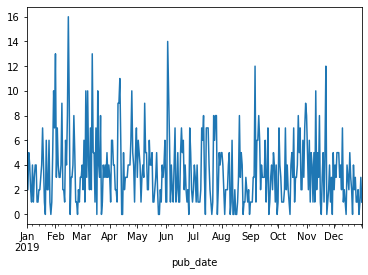

In [178]:
total_df.groupby("pub_date").count()["headline"].resample("D").sum().plot()

### Test case

In [112]:
organizations = ['Apple Inc', 'Amazon.com Inc', 'Facebook Inc', 'Alphabet Inc', 'Tesla Motors Inc', 'Microsoft Corp']

url = "https://api.nytimes.com/svc/search/v2/articlesearch.json"

params = {
    "q": "",
    "fq":"organizations:(Apple Inc)",
    "begin_date": "20190101",
    "end_date": "20191231",
    "api-key": "td7X3SlGWRvZfBdGcUsdB5QqfRgJ7gut",
    "page": 0,  # Start with the first page of results
    "sort":"oldest"
}

response = requests.get(url, params=params)

In [113]:
response
print(response.json()['response']['meta'])

{'hits': 234, 'offset': 0, 'time': 16}


In [ ]:
ls = []
for doc in response.json()['response']['docs']:
    print("\n")
    print(f'Abstract: {doc["abstract"]}')
    print(doc["lead_paragraph"])
    print(doc["web_url"])
    print(doc["pub_date"])
    print(doc["news_desk"])
    print(doc["section_name"])
    print(doc["type_of_material"])
    pprint(doc["keywords"])
    del doc["multimedia"]
    ls.append(doc)

In [86]:
a =  response.json()['response']['docs'][0]



In [89]:
a

{'abstract': 'And what that tells us about the fate of Apple in China.',
 'web_url': 'https://www.nytimes.com/2019/01/05/opinion/sunday/apple-china.html',
 'snippet': 'And what that tells us about the fate of Apple in China.',
 'lead_paragraph': 'I got my first iPhone during Chinese New Year in early 2012. It wasn’t anything I’d aspired to own. I wasn’t particularly techy, nor could I afford the brand as a graduate with a starting salary.',
 'print_section': 'SR',
 'print_page': '11',
 'source': 'The New York Times',
 'headline': {'main': 'Why My Chinese Dad Switched From an iPhone to a Huawei',
  'kicker': None,
  'content_kicker': None,
  'print_headline': 'Why My Chinese Dad Quit His iPhone',
  'name': None,
  'seo': None,
  'sub': None},
 'keywords': [{'name': 'subject',
   'value': 'Computers and the Internet',
   'rank': 1,
   'major': 'N'},
  {'name': 'subject', 'value': 'Smartphones', 'rank': 2, 'major': 'N'},
  {'name': 'subject', 'value': 'iPhone', 'rank': 3, 'major': 'N'},
 